Facial Expression Recognition

### Importing FER Dataset
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manojkhurana","key":"f998b8cd920f3206c2ebf0095cc280da"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
kaggleashwin/population-dataset                                World Population by Countries Dataset (1960-2021)    69KB  2022-08-31 05:30:26           1276         62  1.0              
iamsouravbanerjee/house-rent-prediction-dataset                House Rent Prediction Dataset                        82KB  2022-08-20 13:49:03           9394        252  1.0              
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04           3178        116  1.0              
sveta151/tiktok-popular-songs-2021                             Ti

In [ ]:
pip install opendatasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
import pandas

In [ ]:
od.download(
    "https://www.kaggle.com/datasets/msambare/fer2013/download?datasetVersionNumber=1") 
    #data_dir="/content/gdrive/MyDrive/Colab Notebooks/Facial Expression Recognition Thesis/FER2013 ")

100%|██████████| 60.3M/60.3M [00:01<00:00, 55.4MB/s]


This assignment uses FER 2013 dataset with 7 expression categories

In [ ]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/fer2013/train")
data_dir_test = pathlib.Path('/content/fer2013/test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

28709
7178


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 128
img_height = 48
img_width = 48

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size, shuffle=True)

Found 28709 files belonging to 7 classes.
Using 22968 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size,shuffle=True)

Found 28709 files belonging to 7 classes.
Using 5741 files for validation.


In [ ]:
## Write your test dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  #validation_split = 0.2,
  #subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7178 files belonging to 7 classes.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

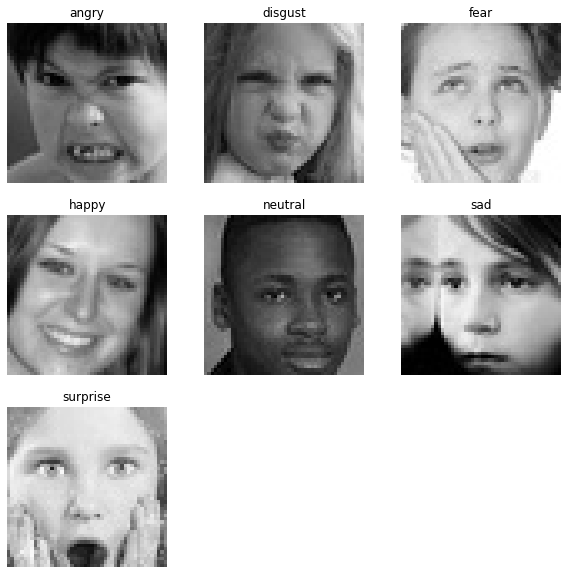

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))

for i in range(len(class_names)):
    filtered_ds = train_ds.filter(lambda x, l: tf.math.equal(l[0], i))
    for image, label in filtered_ds.take(1):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')

The `image_batch` is a tensor of the shape `(32, 48, 48, 3)`. This is a batch of 32 images of shape `48x48x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create base model
#### Todo: Create a CNN model, which can accurately detect 7 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
num_classes = 7


In [ ]:
### Your code goes here

num_classes = 7

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 48, 48, 3)         0         
                                                                 
 conv2d_27 (Conv2D)          (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 24, 24, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 12, 12, 64)      

### Train the model

In [ ]:
epochs = 20
#earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
#mcp_save = ModelCheckpoint('{val_loss:.2f}.hdf5', save_best_only=True, monitor='val_loss', mode='min')
#reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, verbose=1)



Epoch 1/20
718/718 [==============================] - 3s 4ms/step - loss: 0.1297 - accuracy: 0.9576 - val_loss: 3.6485 - val_accuracy: 0.5118
Epoch 2/20
718/718 [==============================] - 4s 5ms/step - loss: 0.1273 - accuracy: 0.9572 - val_loss: 3.6208 - val_accuracy: 0.5024
Epoch 3/20
718/718 [==============================] - 3s 4ms/step - loss: 0.1349 - accuracy: 0.9550 - val_loss: 3.6333 - val_accuracy: 0.5084
Epoch 4/20
718/718 [==============================] - 3s 4ms/step - loss: 0.1132 - accuracy: 0.9614 - val_loss: 3.8916 - val_accuracy: 0.5147
Epoch 5/20
718/718 [==============================] - 3s 4ms/step - loss: 0.1121 - accuracy: 0.9629 - val_loss: 4.0235 - val_accuracy: 0.4982
Epoch 6/20
718/718 [==============================] - 3s 4ms/step - loss: 0.1059 - accuracy: 0.9651 - val_loss: 4.0420 - val_accuracy: 0.5123
Epoch 7/20
718/718 [==============================] - 3s 4ms/step - loss: 0.1108 - accuracy: 0.9646 - val_loss: 4.2786 - val_accuracy: 0.4978
Epoch 

### Visualizing training results

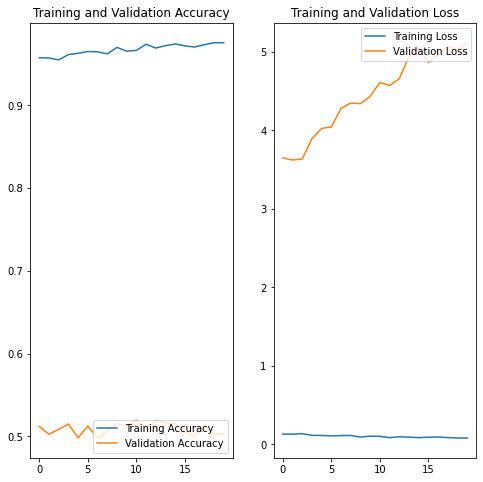

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Observations
We can see in above plot for training and validation accuracy that 

*   While training accuracy increases linearly with epochs, validation accuracy remains between 53% to 55% approximately most of the time.
*   Training and validation acuracy difference is too high which is a sign that model is overfitting

 



### Data Augmentation - Random Crop & base CNN

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomCrop(40, 40),
   
  ]
)

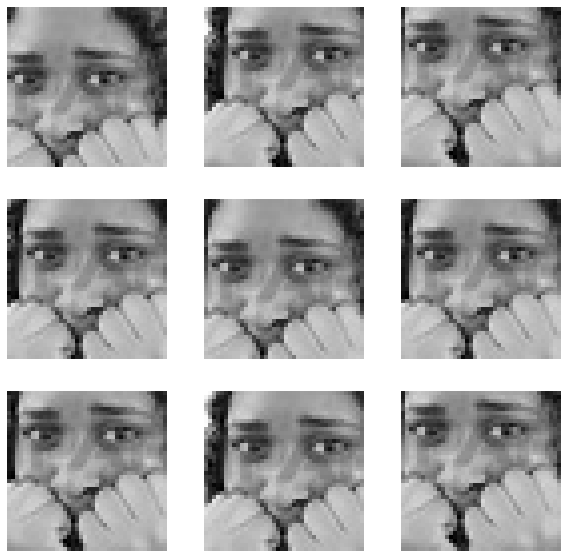

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes)
])



### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
718/718 [==============================] - 6s 7ms/step - loss: 1.7757 - accuracy: 0.2672 - val_loss: 1.7137 - val_accuracy: 0.2977
Epoch 2/100
718/718 [==============================] - 4s 5ms/step - loss: 1.6633 - accuracy: 0.3362 - val_loss: 1.5771 - val_accuracy: 0.3863
Epoch 3/100
718/718 [==============================] - 5s 6ms/step - loss: 1.5467 - accuracy: 0.3975 - val_loss: 1.4749 - val_accuracy: 0.4316
Epoch 4/100
718/718 [==============================] - 4s 5ms/step - loss: 1.4781 - accuracy: 0.4280 - val_loss: 1.4324 - val_accuracy: 0.4522
Epoch 5/100
718/718 [==============================] - 4s 5ms/step - loss: 1.4465 - accuracy: 0.4418 - val_loss: 1.4569 - val_accuracy: 0.4389
Epoch 6/100
718/718 [==============================] - 5s 7ms/step - loss: 1.4114 - accuracy: 0.4553 - val_loss: 1.3582 - val_accuracy: 0.4773
Epoch 7/100
718/718 [==============================] - 4s 5ms/step - loss: 1.3836 - accuracy: 0.4653 - val_loss: 1.3674 - val_accuracy: 0.4755

### Visualizing the results

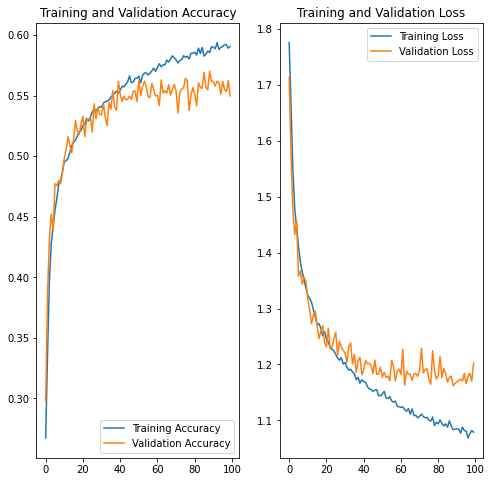

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Data Augmentation - Random Rotation & base CNN

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

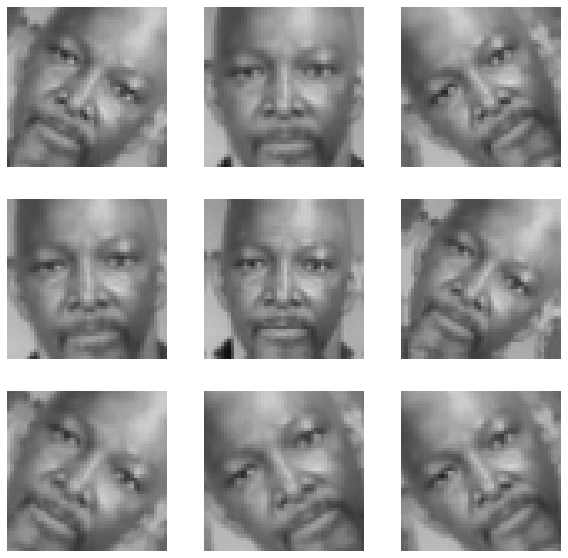

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model

In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
718/718 [==============================] - 5s 5ms/step - loss: 1.7670 - accuracy: 0.2757 - val_loss: 1.6892 - val_accuracy: 0.3200
Epoch 2/100
718/718 [==============================] - 4s 5ms/step - loss: 1.6518 - accuracy: 0.3457 - val_loss: 1.5454 - val_accuracy: 0.4036
Epoch 3/100
718/718 [==============================] - 4s 5ms/step - loss: 1.5551 - accuracy: 0.3969 - val_loss: 1.4559 - val_accuracy: 0.4461
Epoch 4/100
718/718 [==============================] - 4s 5ms/step - loss: 1.4826 - accuracy: 0.4256 - val_loss: 1.4171 - val_accuracy: 0.4565
Epoch 5/100
718/718 [==============================] - 4s 5ms/step - loss: 1.4327 - accuracy: 0.4479 - val_loss: 1.3406 - val_accuracy: 0.4905
Epoch 6/100
718/718 [==============================] - 4s 5ms/step - loss: 1.3918 - accuracy: 0.4667 - val_loss: 1.3462 - val_accuracy: 0.4802
Epoch 7/100
718/718 [==============================] - 4s 5ms/step - loss: 1.3633 - accuracy: 0.4751 - val_loss: 1.3257 - val_accuracy: 0.4872

### Visualizing the results

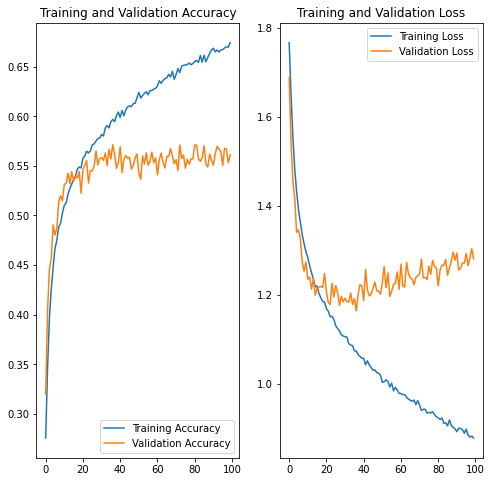

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Data Augentation Vertical Reflection & base CNN


In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip(mode="vertical", seed=12),
    
  ]
)

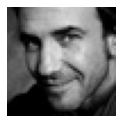

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(2, 2))
for images, _ in train_ds.take(1):
  augmented_images = data_augmentation(images)
  #ax = plt.subplot(2, 1, i + 1)
  plt.imshow(augmented_images[0].numpy().astype("uint8"))
  plt.axis("off")

In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
718/718 [==============================] - 4s 5ms/step - loss: 1.7560 - accuracy: 0.2837 - val_loss: 1.6692 - val_accuracy: 0.3268
Epoch 2/100
718/718 [==============================] - 3s 4ms/step - loss: 1.5958 - accuracy: 0.3725 - val_loss: 1.5158 - val_accuracy: 0.4200
Epoch 3/100
718/718 [==============================] - 3s 4ms/step - loss: 1.4661 - accuracy: 0.4303 - val_loss: 1.4308 - val_accuracy: 0.4564
Epoch 4/100
718/718 [==============================] - 3s 4ms/step - loss: 1.3911 - accuracy: 0.4677 - val_loss: 1.3674 - val_accuracy: 0.4759
Epoch 5/100
718/718 [==============================] - 3s 4ms/step - loss: 1.3314 - accuracy: 0.4880 - val_loss: 1.3162 - val_accuracy: 0.4994
Epoch 6/100
718/718 [==============================] - 3s 4ms/step - loss: 1.2827 - accuracy: 0.5075 - val_loss: 1.3215 - val_accuracy: 0.4983
Epoch 7/100
718/718 [==============================] - 3s 4ms/step - loss: 1.2434 - accuracy: 0.5264 - val_loss: 1.2913 - val_accuracy: 0.5147

### Visualizing the results

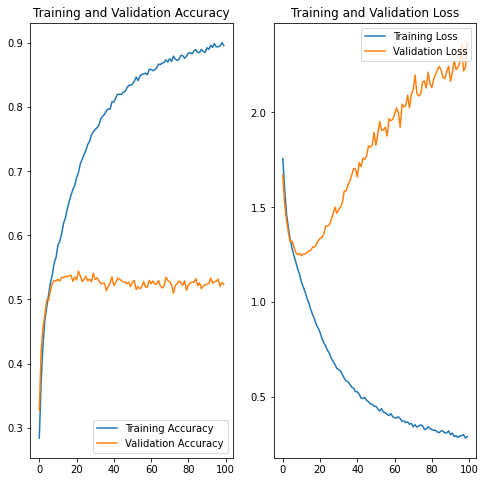

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Data Augmentation Horizontal Flip & base CNN

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", seed=12),
    
  ]
)

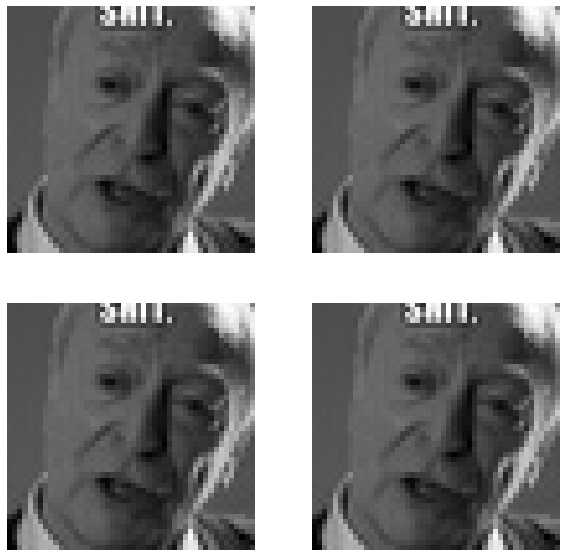

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(4):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
718/718 [==============================] - 4s 5ms/step - loss: 1.6742 - accuracy: 0.3299 - val_loss: 1.5200 - val_accuracy: 0.4158
Epoch 2/100
718/718 [==============================] - 3s 5ms/step - loss: 1.4662 - accuracy: 0.4349 - val_loss: 1.4024 - val_accuracy: 0.4625
Epoch 3/100
718/718 [==============================] - 3s 4ms/step - loss: 1.3516 - accuracy: 0.4855 - val_loss: 1.2949 - val_accuracy: 0.5199
Epoch 4/100
718/718 [==============================] - 3s 4ms/step - loss: 1.2766 - accuracy: 0.5166 - val_loss: 1.2586 - val_accuracy: 0.5180
Epoch 5/100
718/718 [==============================] - 3s 4ms/step - loss: 1.2260 - accuracy: 0.5342 - val_loss: 1.2514 - val_accuracy: 0.5196
Epoch 6/100
718/718 [==============================] - 3s 5ms/step - loss: 1.1869 - accuracy: 0.5495 - val_loss: 1.2217 - val_accuracy: 0.5356
Epoch 7/100
718/718 [==============================] - 3s 4ms/step - loss: 1.1438 - accuracy: 0.5666 - val_loss: 1.2349 - val_accuracy: 0.5396

### Visualizing the results

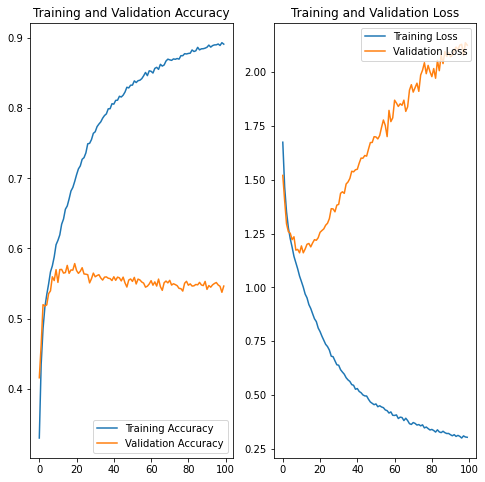

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Data Augmentation Translation & base CNN

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomTranslation(height_factor=(-0.2, 0.3), width_factor=(-0.2, 0.3), fill_mode='reflect',interpolation='bilinear',fill_value=0.0, seed=12),
    
  ]
)

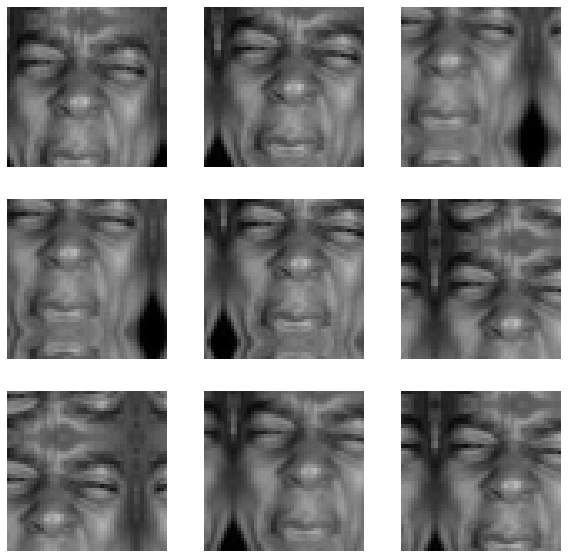

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
718/718 [==============================] - 4s 5ms/step - loss: 1.7953 - accuracy: 0.2545 - val_loss: 1.7539 - val_accuracy: 0.2698
Epoch 2/100
718/718 [==============================] - 3s 5ms/step - loss: 1.7577 - accuracy: 0.2770 - val_loss: 1.7126 - val_accuracy: 0.3015
Epoch 3/100
718/718 [==============================] - 3s 5ms/step - loss: 1.7297 - accuracy: 0.2903 - val_loss: 1.6695 - val_accuracy: 0.3219
Epoch 4/100
718/718 [==============================] - 3s 5ms/step - loss: 1.6947 - accuracy: 0.3147 - val_loss: 1.5842 - val_accuracy: 0.3640
Epoch 5/100
718/718 [==============================] - 3s 4ms/step - loss: 1.6356 - accuracy: 0.3509 - val_loss: 1.4960 - val_accuracy: 0.4292
Epoch 6/100
718/718 [==============================] - 3s 5ms/step - loss: 1.5754 - accuracy: 0.3822 - val_loss: 1.4347 - val_accuracy: 0.4452
Epoch 7/100
718/718 [==============================] - 3s 4ms/step - loss: 1.5231 - accuracy: 0.4061 - val_loss: 1.3814 - val_accuracy: 0.4576

### Visualizing the results

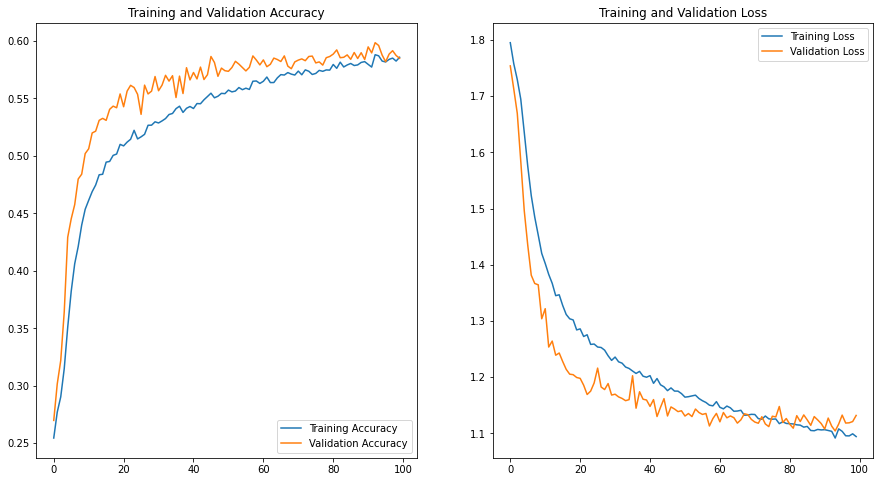

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Data Augmentation Translation and Horizontal Flip & base CNN

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", seed=12),
    layers.experimental.preprocessing.RandomTranslation(height_factor=(-0.2, 0.3), width_factor=(-0.2, 0.3), fill_mode='reflect',interpolation='bilinear',fill_value=0.0, seed=12),
    
  ]
)

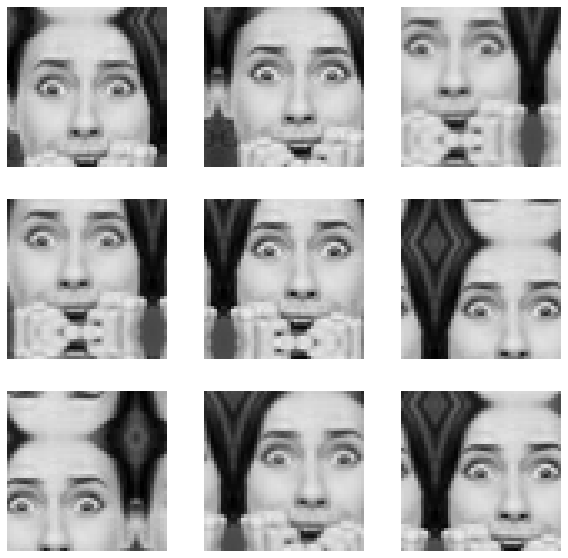

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
718/718 [==============================] - 6s 5ms/step - loss: 1.7999 - accuracy: 0.2512 - val_loss: 1.7675 - val_accuracy: 0.2621
Epoch 2/100
718/718 [==============================] - 4s 5ms/step - loss: 1.7673 - accuracy: 0.2677 - val_loss: 1.7357 - val_accuracy: 0.2766
Epoch 3/100
718/718 [==============================] - 4s 5ms/step - loss: 1.7452 - accuracy: 0.2863 - val_loss: 1.7116 - val_accuracy: 0.2979
Epoch 4/100
718/718 [==============================] - 4s 5ms/step - loss: 1.7190 - accuracy: 0.3000 - val_loss: 1.6336 - val_accuracy: 0.3458
Epoch 5/100
718/718 [==============================] - 4s 5ms/step - loss: 1.6783 - accuracy: 0.3244 - val_loss: 1.5853 - val_accuracy: 0.3863
Epoch 6/100
718/718 [==============================] - 4s 5ms/step - loss: 1.6184 - accuracy: 0.3590 - val_loss: 1.4853 - val_accuracy: 0.4299
Epoch 7/100
718/718 [==============================] - 4s 6ms/step - loss: 1.5609 - accuracy: 0.3873 - val_loss: 1.4214 - val_accuracy: 0.4416

### Visualizing the results

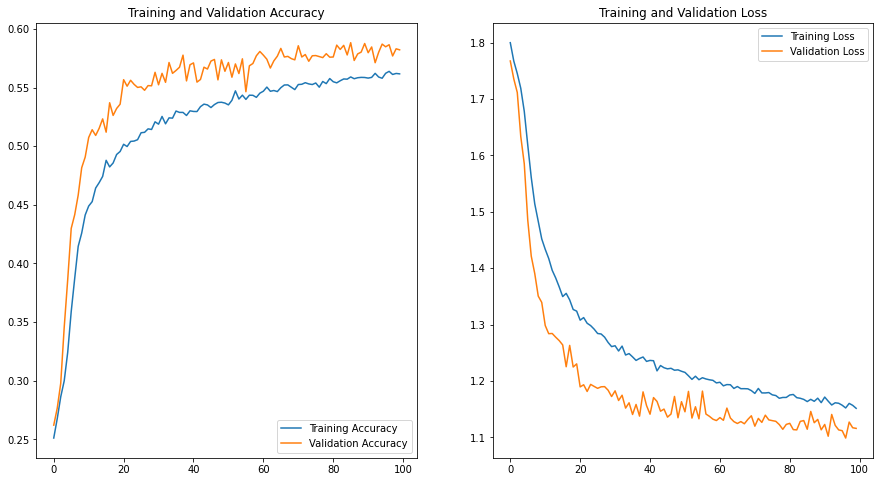

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Data Augmentation Translation and Horizontal Flip & base CNN + more layers

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", seed=12),
    layers.experimental.preprocessing.RandomTranslation(height_factor=(-0.2, 0.3), width_factor=(-0.2, 0.3), fill_mode='reflect',interpolation='bilinear',fill_value=0.0, seed=12),
    
  ]
)

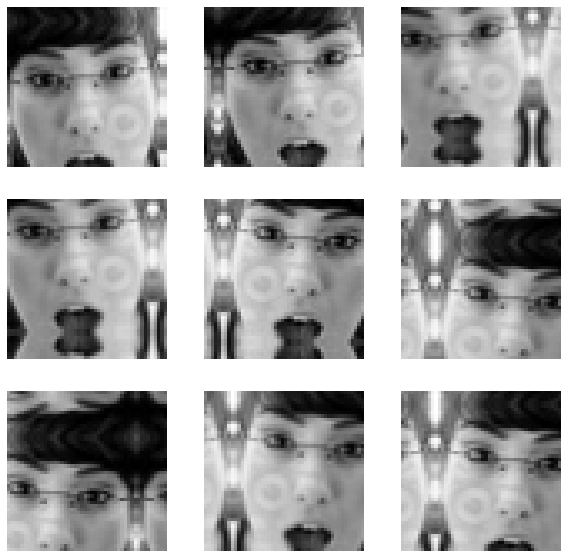

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])




### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
718/718 [==============================] - 5s 5ms/step - loss: 1.8015 - accuracy: 0.2513 - val_loss: 1.7773 - val_accuracy: 0.2566
Epoch 2/100
718/718 [==============================] - 4s 5ms/step - loss: 1.7807 - accuracy: 0.2563 - val_loss: 1.7521 - val_accuracy: 0.2790
Epoch 3/100
718/718 [==============================] - 4s 5ms/step - loss: 1.7511 - accuracy: 0.2811 - val_loss: 1.6864 - val_accuracy: 0.3078
Epoch 4/100
718/718 [==============================] - 4s 5ms/step - loss: 1.7069 - accuracy: 0.3057 - val_loss: 1.6025 - val_accuracy: 0.3816
Epoch 5/100
718/718 [==============================] - 4s 5ms/step - loss: 1.6455 - accuracy: 0.3433 - val_loss: 1.5231 - val_accuracy: 0.4114
Epoch 6/100
718/718 [==============================] - 4s 5ms/step - loss: 1.5816 - accuracy: 0.3805 - val_loss: 1.4234 - val_accuracy: 0.4508
Epoch 7/100
718/718 [==============================] - 4s 5ms/step - loss: 1.5391 - accuracy: 0.4015 - val_loss: 1.3705 - val_accuracy: 0.4806

### Visualizing the results

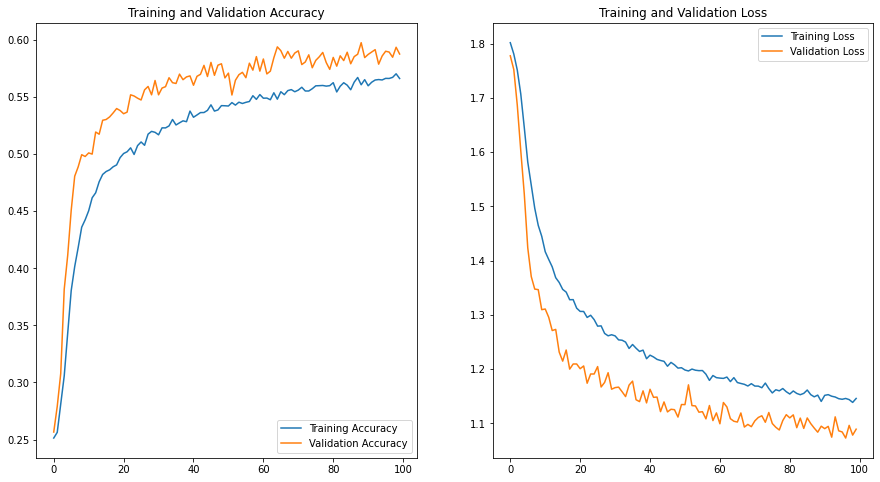

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Data Augmentation Translation and Horizontal Flip with reference CNN

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", seed=12),
    layers.experimental.preprocessing.RandomTranslation(height_factor=(-0.2, 0.3), width_factor=(-0.2, 0.3), fill_mode='reflect',interpolation='bilinear',fill_value=0.0, seed=12),
    
  ]
)

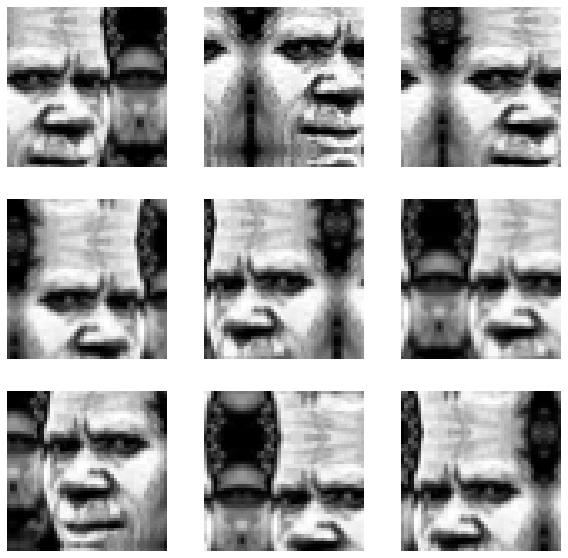

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Conv2D(384, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Conv2D(192, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Conv2D(384, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.3),
  layers.Dense(num_classes)
  
])

### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs


epochs = 200
#earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('/content/gdrive/MyDrive/Colab Notebooks/Facial Expression Recognition Thesis/FER2013/{epoch:02d}-{val_loss:.2f}-cnn-b128.hdf5', save_best_only=True, monitor='val_loss', mode='min')
#reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, verbose=1, callbacks=(mcp_save))

Epoch 1/200
180/180 [==============================] - 62s 241ms/step - loss: 2.1727 - accuracy: 0.2021 - val_loss: 1.8143 - val_accuracy: 0.2522
Epoch 2/200
180/180 [==============================] - 33s 184ms/step - loss: 1.9137 - accuracy: 0.2288 - val_loss: 1.7863 - val_accuracy: 0.2508
Epoch 3/200
180/180 [==============================] - 33s 182ms/step - loss: 1.8453 - accuracy: 0.2471 - val_loss: 1.7917 - val_accuracy: 0.2529
Epoch 4/200
180/180 [==============================] - 33s 182ms/step - loss: 1.7965 - accuracy: 0.2659 - val_loss: 1.8118 - val_accuracy: 0.2620
Epoch 5/200
180/180 [==============================] - 33s 182ms/step - loss: 1.7408 - accuracy: 0.2962 - val_loss: 1.8452 - val_accuracy: 0.2301
Epoch 6/200
180/180 [==============================] - 33s 183ms/step - loss: 1.6562 - accuracy: 0.3439 - val_loss: 1.6232 - val_accuracy: 0.3456
Epoch 7/200
180/180 [==============================] - 33s 183ms/step - loss: 1.5637 - accuracy: 0.3926 - val_loss: 1.4965 -

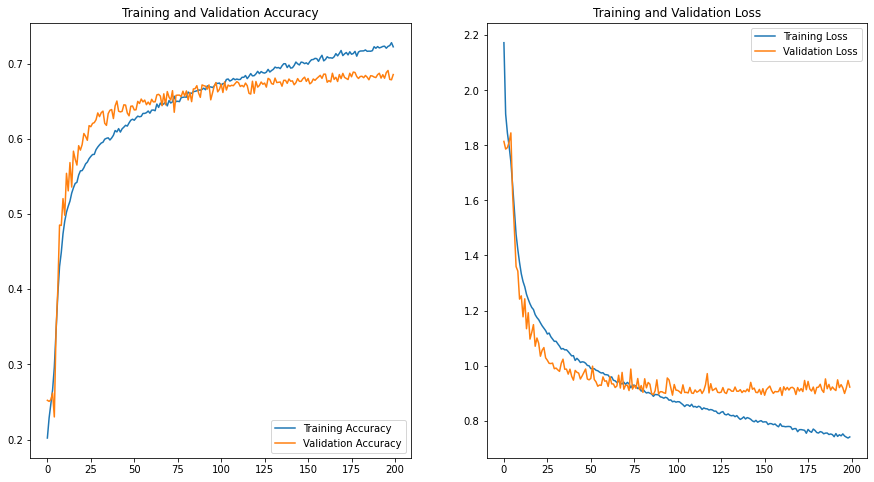

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest accuracy:', test_loss)

57/57 - 5s - loss: 0.9386 - accuracy: 0.6829 - 5s/epoch - 83ms/step

Test accuracy: 0.6829200387001038

Test accuracy: 0.9385948777198792
